In [0]:
# Makes plots / images embedded in the file
%matplotlib inline

In [0]:
from zipfile import ZipFile
from urllib.request import urlopen
import numpy as np

URL = 'https://uwmadison-cs534-term-project-f2018-cdh.github.io/assets/datasets/all.zip'

url = urlopen(URL)
output = open('all.zip','wb')
output.write(url.read())
output.close()

zip_ref = ZipFile('all.zip', 'r')
zip_ref.extractall('./dataset')
zip_ref.close()

In [3]:
# Import data and keras layers

from keras import backend as k
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, Dense, Reshape, Conv2DTranspose, MaxPooling2D, UpSampling2D
from keras.layers import Flatten, Dropout, BatchNormalization, Activation, SpatialDropout2D
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
import os

files = os.listdir('./dataset/all')
for name in files:
    print(name)

all_image.npy
all_label.npy


In [0]:
x1_raw = np.load('./dataset/all/all_image.npy')
y1_raw = np.load('./dataset/all/all_label.npy')

x1_test = np.array([])
y1_test = np.array([])

#Optimizer
adam = Adam(lr=2e-4, beta_1=0.5)

In [6]:
unique = []
for lbl in y1_raw:
  if not lbl in unique:
    unique.append(lbl)
    print(lbl)

all_32x32_effects
all_32x32_items_tools_projectile
all_32x32_entities_humanoid
all_32x32_entities_humanoid_human
all_32x32_entities_humanoid_humanlike
all_32x32_entities_humanoid_humanlike_demonspawn
all_32x32_entities_humanoid_humanlike_spriggan
all_32x32_entities_humanoid_undead
all_32x32_entities_nonhumanoid
all_32x32_entities_nonhumanoid_aberration
all_32x32_entities_nonhumanoid_abyss
all_32x32_entities_nonhumanoid_amorphous
all_32x32_entities_nonhumanoid_animals
all_32x32_skills_spells_components
all_32x32_entities_nonhumanoid_aquatic
all_32x32_entities_nonhumanoid_demons
all_32x32_entities_nonhumanoid_Dragon
all_32x32_entities_nonhumanoid_eyes
all_32x32_entities_nonhumanoid_fungi_plants
all_32x32_entities_nonhumanoid_half-human
all_32x32_entities_nonhumanoid_holy
all_32x32_entities_nonhumanoid_log
all_32x32_entities_nonhumanoid_nonliving
all_32x32_skills_spells_conjuration
all_32x32_environment_decor_traps
all_32x32_skills_spells_summoning
all_32x32_environment
all_32x32_environm

In [0]:
filterLbls = [
    'all_32x32_entities_humanoid',
    'all_32x32_entities_humanoid_human',
    'all_32x32_entities_humanoid_humanlike',
    'all_32x32_entities_humanoid_humanlike_demonspawn',
    'all_32x32_entities_humanoid_humanlike_spriggan',
    'all_32x32_entities_humanoid_undead',
  ]

y1_train = []

firstTime = True
for i in range(y1_raw.shape[0]):
  
  if y1_raw[i] in filterLbls:
    y1_train.append(y1_raw[i])
    
    if firstTime:
      firstTime = False
      raw = x1_raw[i,:,:,:]
      x1_train = np.reshape(raw,(1,raw.shape[0],raw.shape[1],raw.shape[2]))
    else:
      raw = x1_raw[i,:,:,:]
      raw = np.reshape(raw,(1,raw.shape[0],raw.shape[1],raw.shape[2]))
      x1_train = np.concatenate((x1_train,raw), axis=0)
    
y1_train = np.array(y1_train)

In [32]:
#Encoder1
inputShape = (32,32,4)

encoder = Sequential()
encoder.add(Conv2D(16, (3,3), activation='relu', padding='same', input_shape=inputShape)) 
encoder.add(SpatialDropout2D(0.25))
encoder.add(Conv2D(32, (3,3), strides=(2,2), activation='relu', padding='same'))
encoder.add(Conv2D(64, (3,3), strides=(2,2), activation='relu', padding='same'))

print(encoder.summary())

#Decoder1
codeShape = (8,8,64)

decoder = Sequential()
decoder.add(Conv2DTranspose(32, (3,3), strides=(2,2), activation='relu', padding='same', input_shape=codeShape))
decoder.add(Conv2DTranspose(16, (3,3), strides=(2,2), activation='relu', padding='same'))
decoder.add(Conv2DTranspose(4, (3,3), activation='sigmoid', padding='same'))

print(decoder.summary())

#Autoencoder1
inputImage1 = Input(shape=inputShape)
x = encoder(inputImage1)
x = decoder(x)
autoencoder = Model(inputImage1, x)
print(autoencoder.summary())
print(x1_train.shape)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        592       
_________________________________________________________________
spatial_dropout2d_2 (Spatial (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          18496     
Total params: 23,728
Trainable params: 23,728
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_4 (Conv2DTr (None, 16, 16, 32)        18464     
_________________________________________________________________
c

In [33]:
encoder.trainable = True
decoder.trainable = True
autoencoder.trainable = True

history = autoencoder.fit(x1_train, x1_train, epochs=15, batch_size=1, shuffle=True)

Epoch 1/15
1247/1247 [==============================] - 13s 11ms/step - loss: 0.3149
Epoch 2/15
1247/1247 [==============================] - 13s 10ms/step - loss: 0.2346
Epoch 3/15
1247/1247 [==============================] - 13s 10ms/step - loss: 0.2218
Epoch 4/15
1247/1247 [==============================] - 13s 10ms/step - loss: 0.2064
Epoch 5/15
1247/1247 [==============================] - 13s 10ms/step - loss: 0.2049
Epoch 6/15
1247/1247 [==============================] - 13s 10ms/step - loss: 0.1982
Epoch 7/15
1247/1247 [==============================] - 13s 10ms/step - loss: 0.1917
Epoch 8/15
1247/1247 [==============================] - 13s 10ms/step - loss: 0.1869
Epoch 9/15
1247/1247 [==============================] - 13s 10ms/step - loss: 0.1871
Epoch 10/15
1247/1247 [==============================] - 13s 10ms/step - loss: 0.1813
Epoch 11/15
1247/1247 [==============================] - 13s 10ms/step - loss: 0.1815
Epoch 12/15
1247/1247 [==============================] - 13s 10

(32, 32, 4)
(32, 32, 4)


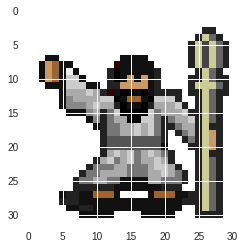

In [42]:
import random
x = random.randint(0,len(x1_train)-1)
randImg = np.reshape(x1_train[x], (1, 32, 32, 4)) 

resultImg = encoder.predict(randImg, batch_size=1)
resultImg = decoder.predict(resultImg, batch_size=1)
randImg = randImg.reshape(32,32,4)
resultImg = resultImg.reshape(32,32,4)

print(randImg.shape)
print(resultImg.shape)
from matplotlib import pyplot as plt
origFig = plt.imshow(randImg)



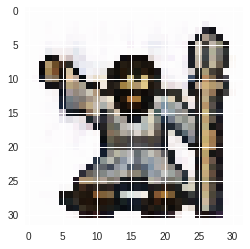

In [43]:
resFig = plt.imshow(resultImg)

In [0]:
from keras.models import load_model
from google.colab import files

model_name = 'autoencoder-all-3000-epoch.h5'
gan.save(model_name)
files.download(model_name)